In [1]:
import pandas as pd 
from sklearn.datasets import fetch_california_housing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = "/Users/ZINA/Desktop/IRONHACK/Week_7/parkinsons/telemonitoring/parkinsons_updrs.data"
park_data = pd.read_csv(df)
park_data.dropna(how='all', inplace=True)
park_data.drop_duplicates(inplace=True)
park_data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
park_data.isnull().sum()

In [ ]:
park_data.columns

In [ ]:
park_data['subject#'].nunique()

In [ ]:
park_data['age'].min()

In [ ]:
park_data['age'].max()

Pie Chart for the sex distribution

In [ ]:
age_counts = park_data['sex'].value_counts()

plt.figure()
age_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # removes the y-label
plt.title('Sex Distribution')
plt.show()

Histogram for the Age Distribution

In [ ]:
plt.figure()
plt.hist(park_data['age'], bins=30)  # increase bins
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Data Preparation

Begin feature engineering to enhance your model's predictive capabilities.


In [3]:
features = park_data.drop(columns = ["total_UPDRS"])
target = park_data["total_UPDRS"]

Division between Train and Test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

The normalization of the data

In [6]:
normalizer = MinMaxScaler() # x_new = (x - min(x)) / (max(x) -min(x))

normalizer.fit(X_train)

MinMaxScaler()

In [7]:
scaler = StandardScaler() # x_new = (x - mean(x)) / std(x)

scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_norm_np = normalizer.transform(X_train)
X_test_norm_np = normalizer.transform(X_test)

In [9]:
X_train_norm_df = pd.DataFrame(X_train_norm_np, columns = X_train.columns, index=X_train.index)
X_train_norm_df.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
598,0.097561,0.795918,0.0,0.276177,0.753113,0.041502,0.086457,0.031638,0.033994,0.031751,...,0.175926,0.130821,0.163436,0.140199,0.130779,0.036800,0.429787,0.568548,0.430424,0.306844
4511,0.780488,0.612245,1.0,0.157739,0.551711,0.025003,0.017955,0.021849,0.015912,0.021963,...,0.104424,0.064510,0.066453,0.057735,0.064489,0.029850,0.515800,0.446898,0.035982,0.299346
5284,0.926829,0.612245,0.0,0.299303,0.696722,0.219455,0.489015,0.214823,0.124259,0.214798,...,0.263374,0.154911,0.172220,0.123530,0.154870,0.178509,0.394223,0.731816,0.315366,0.473037
1431,0.219512,0.448980,0.0,0.257647,0.201962,0.108007,0.232057,0.074987,0.077824,0.075095,...,0.194444,0.087297,0.094560,0.072059,0.087297,0.043278,0.516521,0.515975,0.463221,0.409601
3582,0.609756,0.265306,0.0,0.755998,0.517946,0.052637,0.096517,0.048243,0.038189,0.048354,...,0.468107,0.378803,0.373819,0.249588,0.378782,0.045218,0.417480,0.526395,0.551513,0.319810


In [10]:
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns = X_test.columns, index=X_test.index)
X_test_norm_df.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5588,0.975610,0.653061,1.0,0.053453,0.713517,0.072173,0.106713,0.070267,0.050629,0.070259,...,0.126543,0.077487,0.083111,0.099718,0.077466,0.038975,0.501192,0.512072,0.529042,0.323404
4802,0.829268,0.714286,0.0,0.080475,0.902591,0.162263,0.228019,0.162559,0.136554,0.162540,...,0.313786,0.228052,0.282287,0.221819,0.228031,0.078127,0.320157,0.630878,0.670895,0.549664
3060,0.536585,0.469388,1.0,0.763006,0.221223,0.032392,0.043195,0.031987,0.027629,0.032100,...,0.092078,0.073761,0.068452,0.049346,0.073761,0.009661,0.557462,0.450022,0.509444,0.216165
4228,0.731707,0.795918,0.0,0.908169,0.409891,0.156595,0.244259,0.129348,0.116013,0.129391,...,0.437757,0.179685,0.307548,0.433015,0.179643,0.123151,0.311093,0.722951,0.674223,0.616313
5796,1.000000,0.510204,0.0,0.701209,0.491694,0.025205,0.059187,0.024122,0.023723,0.024177,...,0.060700,0.038619,0.053065,0.053559,0.038619,0.009804,0.621078,0.361393,0.281659,0.214375


In [11]:
X_train_standarized_np = scaler.transform(X_train)
X_test_standarized_np = scaler.transform(X_test)

X_train_standarized_df = pd.DataFrame(X_train_standarized_np, columns = X_train.columns, index=X_train.index)
X_test_standarized_df  = pd.DataFrame(X_test_standarized_np, columns = X_test.columns, index=X_test.index)

In [ ]:
X_train_norm_df.describe()

In [ ]:
X_train_standarized_df.describe()

Linear Regression

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg2 = LinearRegression()

In [14]:
lin_reg.fit(X_train_norm_df, y_train)

LinearRegression()

In [15]:
lin_reg2.fit(X_train_standarized_df, y_train)

LinearRegression()

In [16]:
import pickle

with open("linear_model_normalized.pkl", "wb") as file:
    pickle.dump(lin_reg, file)

with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [18]:
y_pred_test = lin_reg.predict(X_test_norm_df)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_norm_df, y_test): .2f}") # r2_score

MAE  2.42
MSE  10.69
RMSE,  3.27
R2 score,  0.90


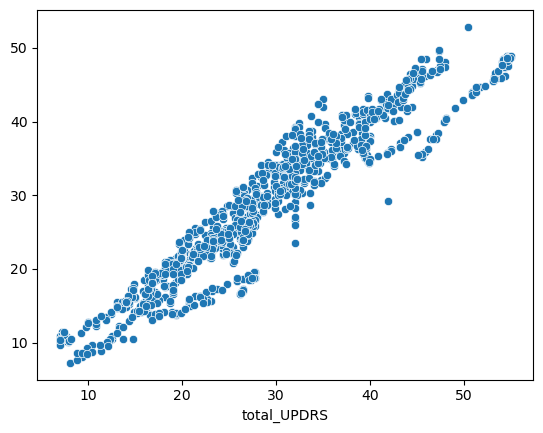

In [19]:
sns.scatterplot(x=y_test, y=y_pred_test); # y_pred_test = y_test;  y_pred_test = 0 + y_test; y_pred_test = 0 + 1 * y_test

In [20]:
y_pred_test2 = lin_reg2.predict(X_test_standarized_df)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test2, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test2, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg2.score(X_test_standarized_df, y_test): .2f}")

MAE  2.42
MSE  10.69
RMSE,  3.27
R2 score,  0.90


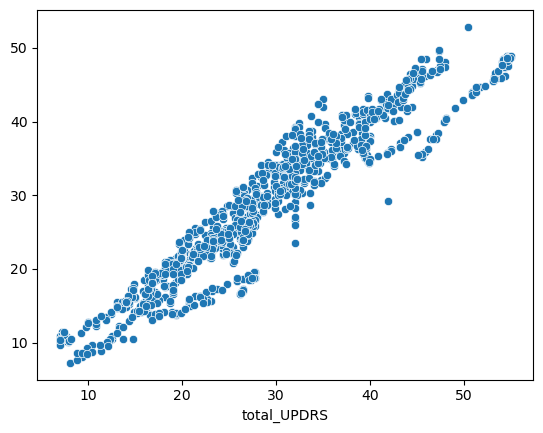

In [21]:
sns.scatterplot(x=y_test, y=y_pred_test2);

In [22]:
results = pd.DataFrame({"y_test": y_test, "lin_reg": y_pred_test, "lin_reg2": y_pred_test2})
results

,y_test,lin_reg,lin_reg2
5588,37.635,38.399602,38.399602
4802,54.153,48.433288,48.433288
3060,26.443,17.222209,17.222209
4228,23.237,25.698706,25.698706
5796,32.988,31.665646,31.665646
...,...,...,...
4698,54.550,48.631117,48.631117
2328,34.807,37.177859,37.177859
5696,43.104,44.685349,44.685349
862,39.136,36.077335,36.077335


In [23]:
results_melted = results.melt(id_vars="y_test")
results_melted

,y_test,variable,value
0,37.635,lin_reg,38.399602
1,54.153,lin_reg,48.433288
2,26.443,lin_reg,17.222209
3,23.237,lin_reg,25.698706
4,32.988,lin_reg,31.665646
...,...,...,...
2345,54.550,lin_reg2,48.631117
2346,34.807,lin_reg2,37.177859
2347,43.104,lin_reg2,44.685349
2348,39.136,lin_reg2,36.077335


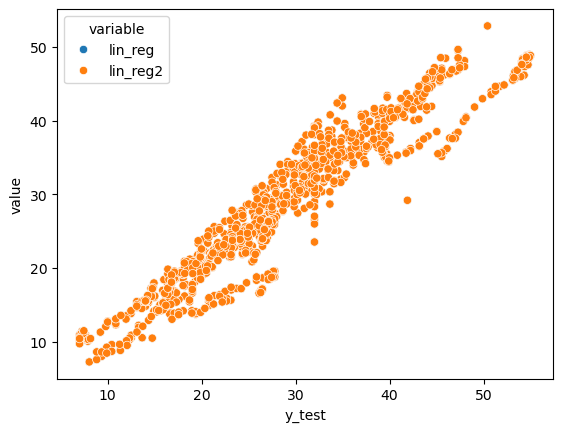

In [24]:
sns.scatterplot(data=results_melted, y="value", x="y_test", hue="variable");

In [25]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm_df.columns, lin_reg.coef_)}
lin_reg_coef

{'subject#': np.float64(2.0212751706260943),
 'age': np.float64(3.744333946680296),
 'sex': np.float64(-1.8265475192321299),
 'test_time': np.float64(0.5758802660866974),
 'motor_UPDRS': np.float64(41.660401522418574),
 'Jitter(%)': np.float64(-44.298484420792285),
 'Jitter(Abs)': np.float64(9.019842038095714),
 'Jitter:RAP': np.float64(348.06011816293017),
 'Jitter:PPQ5': np.float64(7.660934918136058),
 'Jitter:DDP': np.float64(-317.11148976327604),
 'Shimmer': np.float64(-14.829219227985616),
 'Shimmer(dB)': np.float64(4.108654140606008),
 'Shimmer:APQ3': np.float64(-1381.070067687682),
 'Shimmer:APQ5': np.float64(19.901686348161792),
 'Shimmer:APQ11': np.float64(-12.10302456703851),
 'Shimmer:DDA': np.float64(1377.3867035343717),
 'NHR': np.float64(-3.095938767352576),
 'HNR': np.float64(-2.7812376812712345),
 'RPDE': np.float64(2.0720138799640644),
 'DFA': np.float64(-1.5790706946080073),
 'PPE': np.float64(-2.2709687170371913)}

In [26]:
lin_reg.intercept_

np.float64(8.78394442285757)

In [ ]:
## Advanced Modeling

In [ ]:
## Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [29]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", rf_mae)
print("Random Forest R²:", rf_r2)


Random Forest MAE: 0.12627032851063882
Random Forest R²: 0.9993661982966899
